In [1]:
%load_ext autoreload
%autoreload 2

## Make screen wider, add planktonpy folder to system path to enable import:

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../..'))

In [2]:
# imports, define a handy figure function:

import plankton.plankton as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import os 

def figure(width=8,height=8):
    plt.figure(figsize=(width,height))


In [3]:
um_p_px=1

coordinates = pd.read_csv(os.path.join('C:\\','Users','Sebastian','data','xenium-benchmark','ssam_molecule_annotations_11-11-2022.csv'))
# bg = plt.imread('/home/sebastian/data/hpa-HnE-data/ISS/102ks_bg_mock_HnE.jpg')
# dapi_map = pl.PixelMap(bg,px_p_um=1)

In [4]:
sdata = pl.SpatialData(coordinates.feature_name,
                        coordinates.x_location*um_p_px+10,
                      coordinates.y_location*um_p_px+10,
#                       pixel_maps={'dapi':dapi_map},
                      )

In [5]:
from plankton import ssam

ssam.localmax_sampling(sdata,bandwidth=3,min_signal_norm=0.5,min_distance=3)[1][0].shape
ssam.normalize_vectors(sdata)
ssam.cluster_vectors(sdata,pca_dims=60,resolution=0.5)

[2940 4142]
(25687, 60)
Found 32 clusters


In [15]:

ct_map = ssam.ssam(sdata,kernel_bandwidth=2.5,threshold_exp=1,patch_length=3000,output_um_p_px=2)

[12, 2939] [14, 3014, 4141]


  0%|          | 0/2 [00:00<?, ?it/s]

[0 0] [2933.5 3006.5]
[0 0] [2930.5 1133.5]


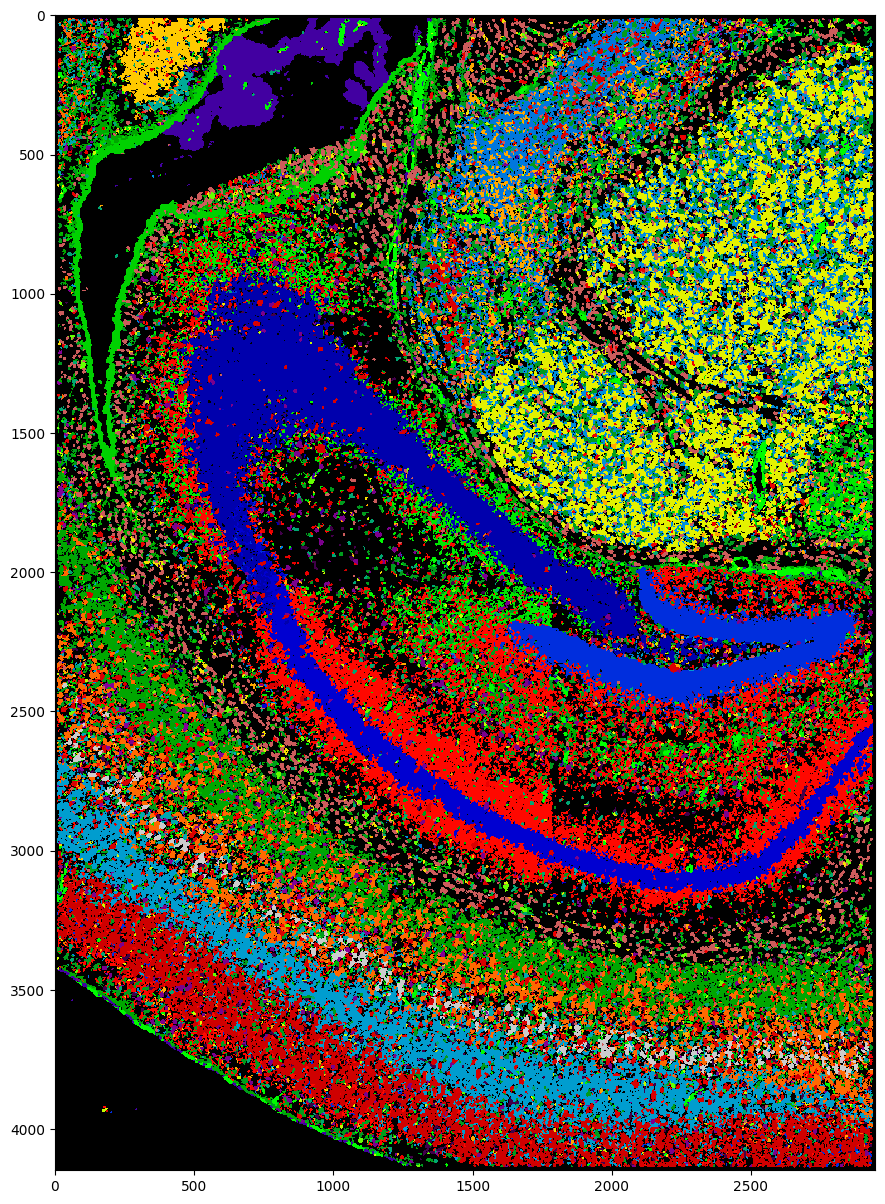

In [16]:
plt.figure(figsize=(15,15))

# plt.imshow(sdata.uns['ssam']['ct_map_filtered'],cmap='nipy_spectral',)

ct_map.imshow(cmap='nipy_spectral',interpolation='none')

<IPython.core.display.Javascript object>


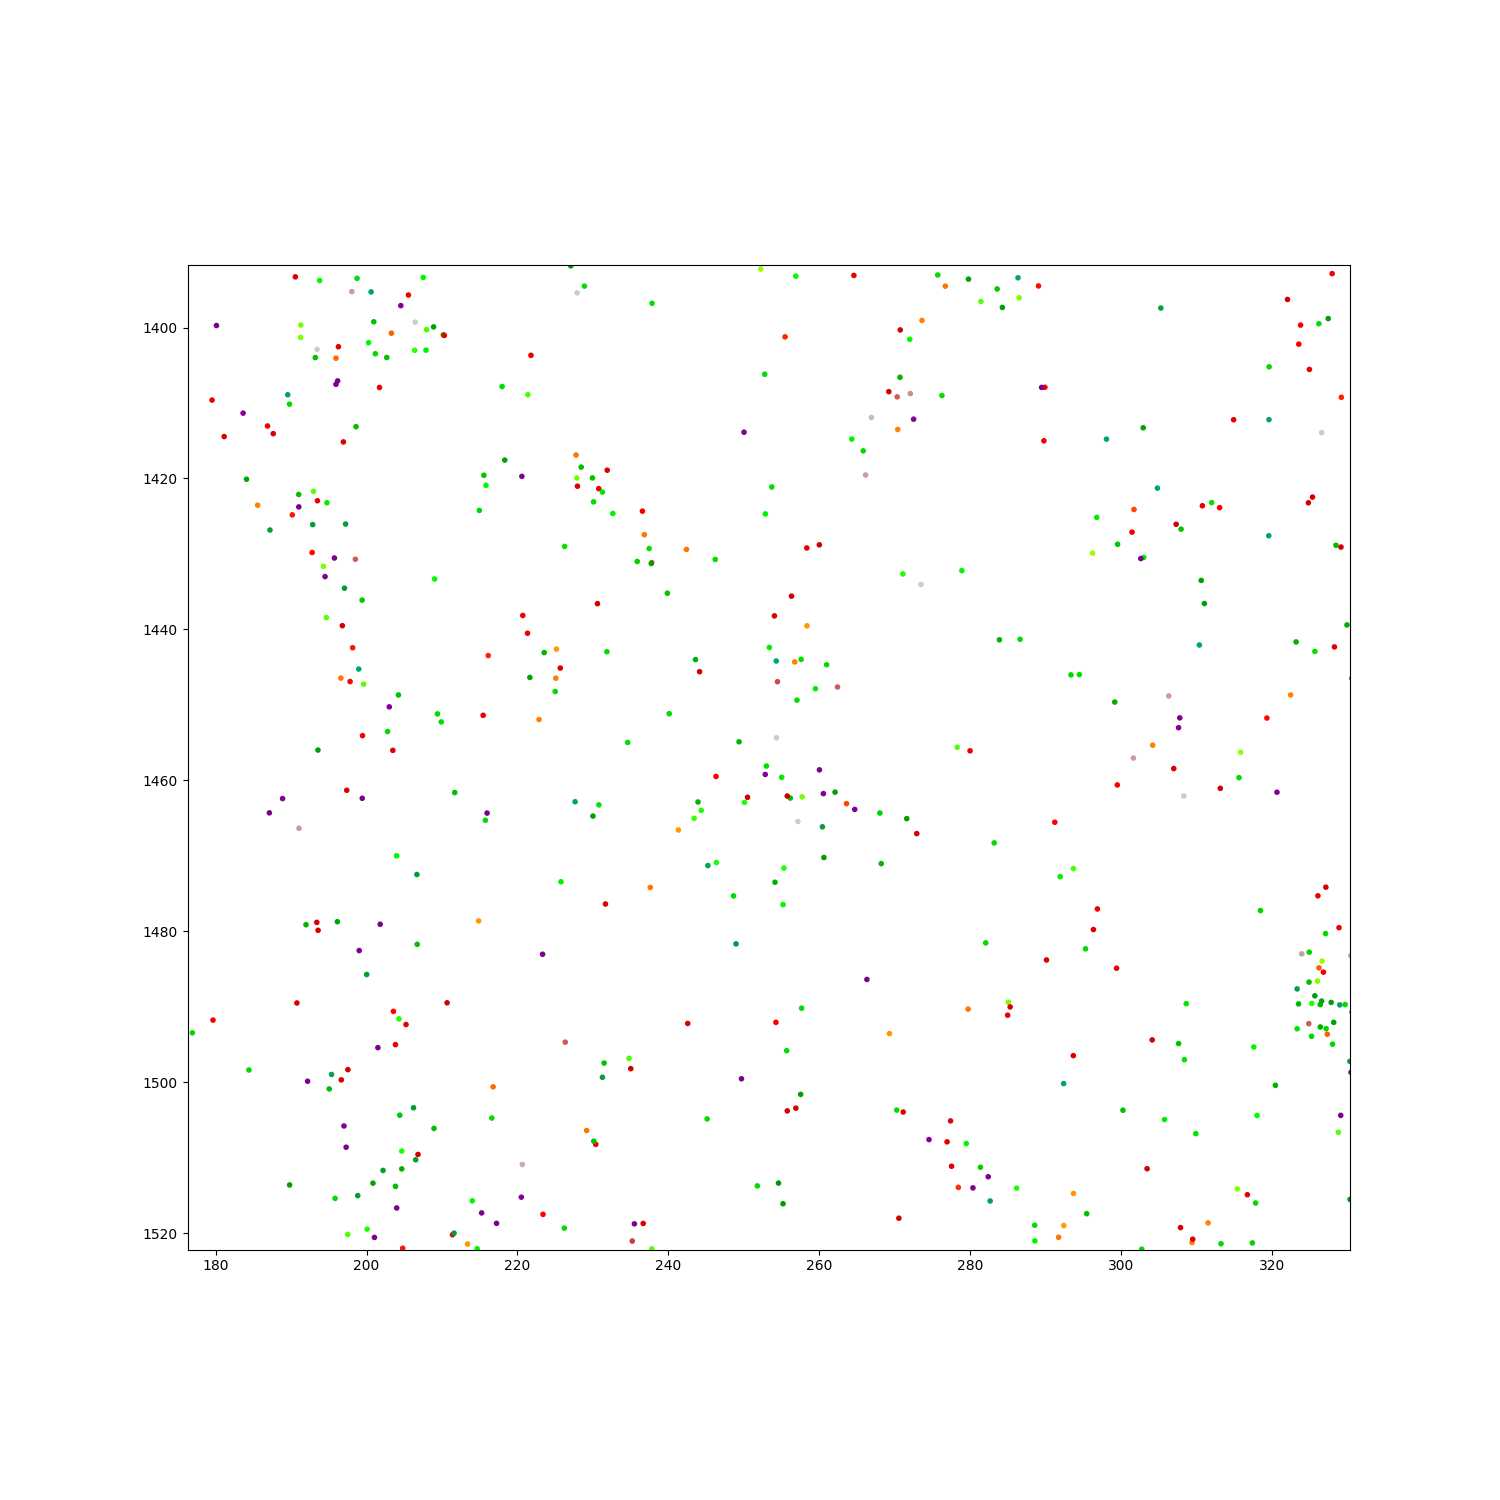

(<matplotlib.collections.PathCollection at 0x2059cfda9d0>, None, None)

In [27]:
%matplotlib notebook
sdata[::20].scatter()